#**`Predicting Likelihood of Churn in Massive Open Online Courses Using Multivariable Logistic Regression`** 

##**Introduction**

###Massive Open Online Courses (MOOCs) offer an affordable and flexible way for people to learn technical or professional skills at scale. Even prestigious institutions like Harvard and MIT provide MOOC content, but they struggle with high attrition rates, with up to 96% of students dropping out over a five-year period. Despite the fact that tens of thousands of students enroll in MOOCs, name recognition only helps with recruitment and marketing, and retention rates are extremely low. In fact, the proportion of students who actually complete MOOCs ranges from 1 to 5% on platforms such as Coursera, Udemy, and EDX. Analysts and academics refer to the goal of successful MOOCs as the retention funnel, and if these low completion rates occurred in an in-person educational setting, the school would likely be shut down.

###Despite the high attrition rates, the MOOC market value in the educational technology sector is expected to grow by 40% within the next seven years, according to market research firm Data Bridge. However, this growth may be hampered by the high student attrition rates. Therefore, the aim of this project is to identify and leverage variables that can predict and prevent student attrition.

###The overall objective of this project is to use available demographic, behavioral, and content-based features to predict whether or not a student will complete a MOOC. The hypothesis is that by combining demographic, behavioral, and content-based numeric features in a multivariable logistic regression model, it will be possible to predict whether or not a student will earn a certificate of completion in a course on platforms such as EDX or Udemy.




In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.metrics import classification_report

# Section 1: Exploratory Data Analysis

In [89]:
edx_courses = pd.read_csv('edx_courses.csv')

In [90]:
edx_courses.head(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [91]:
edx_courses.shape

(975, 16)

In [92]:
# Renaming some columns for a better understanding and view
edx_courses.columns=['EDX_Title', 'Summary', 'N_Enrolled', 'Course_Type', 'Institution', 'EDX_Instructors', 'Level', 'EDX_Subject', 'Language', 'Subtitles', 'Course_Effort', 'Course_Length', 'EDX_Price', ' Course_Description', 'Course_Syllabus', 'Course_URL']

In [93]:
edx_courses.head(3)

,EDX_Title,Summary,N_Enrolled,Course_Type,Institution,EDX_Instructors,Level,EDX_Subject,Language,Subtitles,Course_Effort,Course_Length,EDX_Price,Course_Description,Course_Syllabus,Course_URL
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...


#### The next dataset also includes information related to EDX. However, this file contains data relating to student metrics including percentage who earned a certificate, which will later be used as a target variable for the regression model.

In [94]:
mooc_2016 = pd.read_csv('edx_2016.csv')

In [95]:
mooc_2016.head()

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,...,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33


In [96]:
mooc_2016.columns = ['Institution', 'Course_Number', 'Launch_Date', 'Title', 'Instructors', 'Subject', 'Year', 'Honor_Code_Certificates', 'Participants', 'N_Completed_50_Percent_Audit', 'Certificate', 'Percentage_Audited', 'Percentage_Certified', 'Course_Content_Accessed', 'Played_Video', 'Posted_In_Forum', 'Grade_Higher_Than_Zero', 'Total_Course_Hours', 'Hours_Certification', 'Age', 'Male', 'Female', 'Bachelors_Or_Higher']

In [97]:
mooc_2016.head(3)

,Institution,Course_Number,Launch_Date,Title,Instructors,Subject,Year,Honor_Code_Certificates,Participants,N_Completed_50_Percent_Audit,...,Course_Content_Accessed,Played_Video,Posted_In_Forum,Grade_Higher_Than_Zero,Total_Course_Hours,Hours_Certification,Age,Male,Female,Bachelors_Or_Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76


In [98]:
#checking for NaN values
mooc_2016.isna().sum()

Institution                     0
Course_Number                   0
Launch_Date                     0
Title                           0
Instructors                     1
Subject                         0
Year                            0
Honor_Code_Certificates         0
Participants                    0
N_Completed_50_Percent_Audit    0
Certificate                     0
Percentage_Audited              0
Percentage_Certified            0
Course_Content_Accessed         0
Played_Video                    0
Posted_In_Forum                 0
Grade_Higher_Than_Zero          0
Total_Course_Hours              0
Hours_Certification             0
Age                             0
Male                            0
Female                          0
Bachelors_Or_Higher             0
dtype: int64

In [99]:
#pd.to_datetime() function converts a string or integer representing a date or time to a Pandas datetime object,
#which is a data type that represents dates and times in a way that can be easily manipulated and analyzed.

mooc_2016['Launch_Date'] = pd.to_datetime(mooc_2016['Launch_Date'])

In [100]:
# removing the NaN values
mooc_2016.dropna(how='any', inplace=True)

In [101]:
mooc_2016.isna().sum()

Institution                     0
Course_Number                   0
Launch_Date                     0
Title                           0
Instructors                     0
Subject                         0
Year                            0
Honor_Code_Certificates         0
Participants                    0
N_Completed_50_Percent_Audit    0
Certificate                     0
Percentage_Audited              0
Percentage_Certified            0
Course_Content_Accessed         0
Played_Video                    0
Posted_In_Forum                 0
Grade_Higher_Than_Zero          0
Total_Course_Hours              0
Hours_Certification             0
Age                             0
Male                            0
Female                          0
Bachelors_Or_Higher             0
dtype: int64

#### creating bivariate scatter plots to reveal relationships between academic history and course performance.   

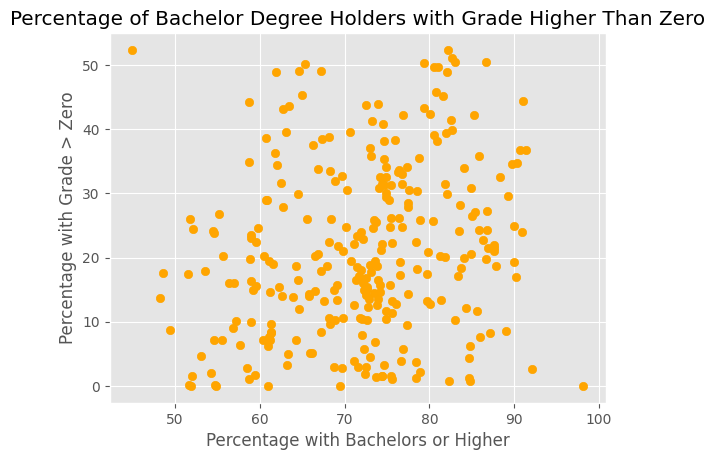

In [102]:
plt.scatter(x = 'Bachelors_Or_Higher', y = 'Grade_Higher_Than_Zero', data = mooc_2016, color = 'orange')
plt.title('Percentage of Bachelor Degree Holders with Grade Higher Than Zero')
plt.xlabel('Percentage with Bachelors or Higher')
plt.ylabel('Percentage with Grade > Zero')
plt.show()

#### One of the major challenges of churn is to convert users on a free trial into paying customers. The graph below exhibits how unlikely it is for students auditing a course to later become certificate holders. 

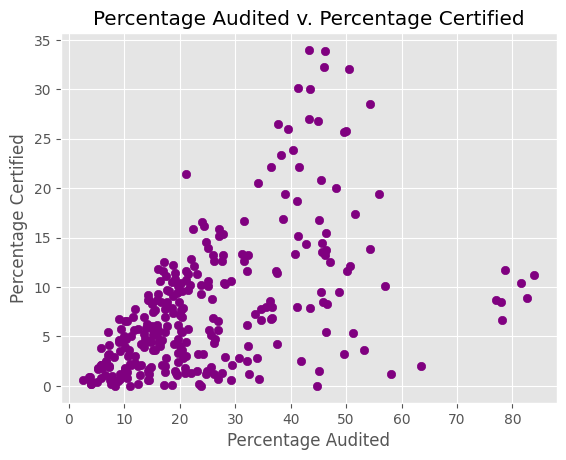

In [103]:
plt.scatter(x = 'Percentage_Audited', y = 'Percentage_Certified', data = mooc_2016, color = 'purple')
plt.title('Percentage Audited v. Percentage Certified')
plt.xlabel('Percentage Audited')
plt.ylabel('Percentage Certified')
plt.show()

Text(0, 0.5, 'Completed > 50 Percent of Course')

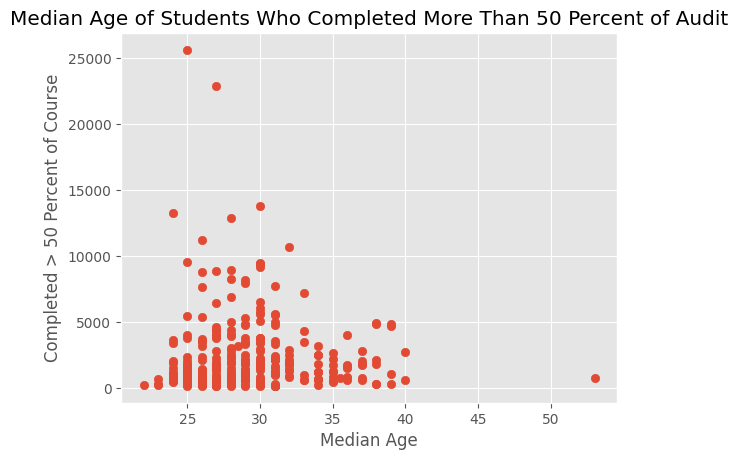

In [104]:
plt.scatter(x = 'Age', y = 'N_Completed_50_Percent_Audit', data = mooc_2016)
plt.title('Median Age of Students Who Completed More Than 50 Percent of Audit')
plt.xlabel('Median Age')
plt.ylabel('Completed > 50 Percent of Course')

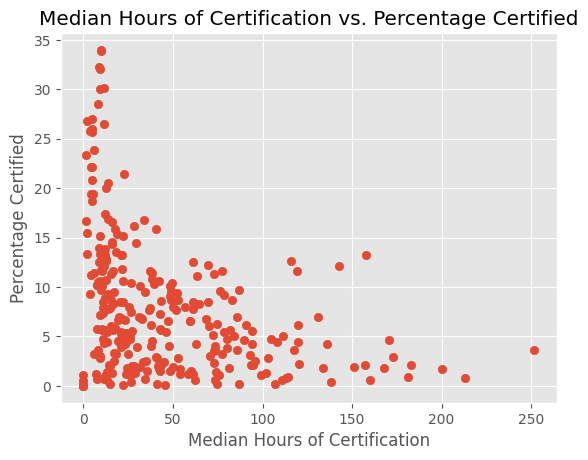

In [105]:
plt.scatter(x = 'Hours_Certification', y = 'Percentage_Certified', data = mooc_2016)
plt.title('Median Hours of Certification vs. Percentage Certified')
plt.xlabel('Median Hours of Certification')
plt.ylabel('Percentage Certified')
plt.show()

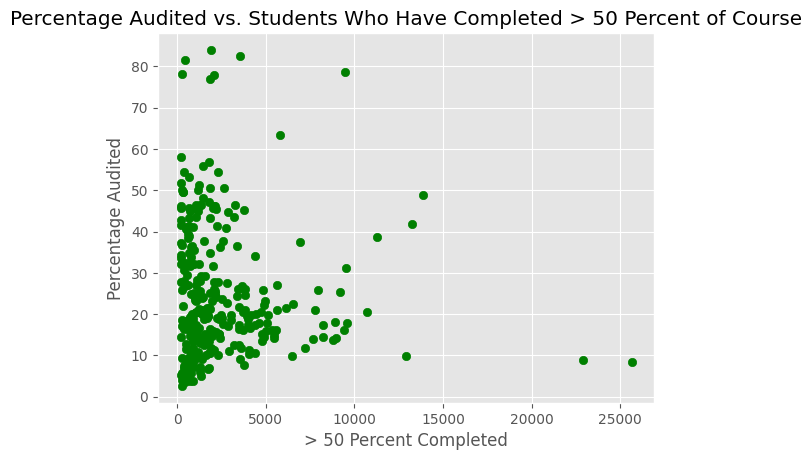

In [106]:
plt.scatter(x = 'N_Completed_50_Percent_Audit', y = 'Percentage_Audited', data = mooc_2016, color = 'green')
plt.title('Percentage Audited vs. Students Who Have Completed > 50 Percent of Course')
plt.xlabel('> 50 Percent Completed')
plt.ylabel('Percentage Audited')
plt.show()

<ipython-input-107-931866cb2697>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=20)


<Axes: xlabel='Hours_Certification', ylabel='Density'>

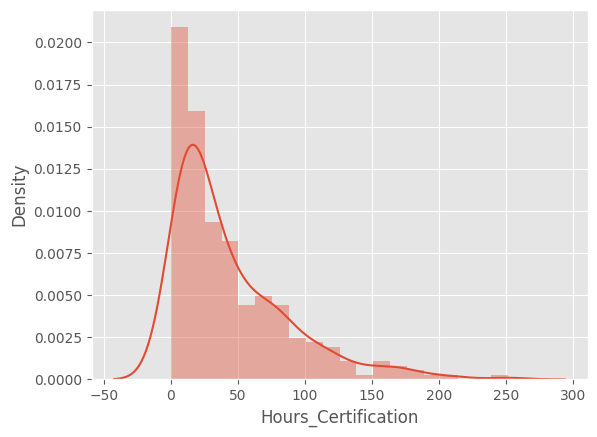

In [107]:
x = mooc_2016['Hours_Certification']
sns.distplot(x, bins=20)

<ipython-input-108-8d535a14f14d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue', bins=20)


<Axes: xlabel='Age', ylabel='Density'>

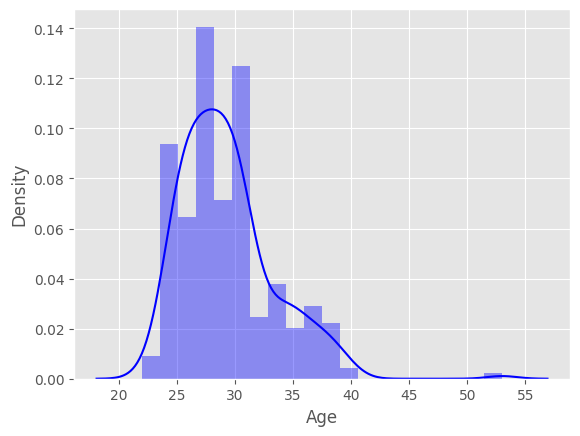

In [108]:
x = mooc_2016['Age']
sns.distplot(x, color = 'blue', bins=20)

<ipython-input-109-d1a8511c3fe6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=15, color='gold')


<Axes: xlabel='Bachelors_Or_Higher', ylabel='Density'>

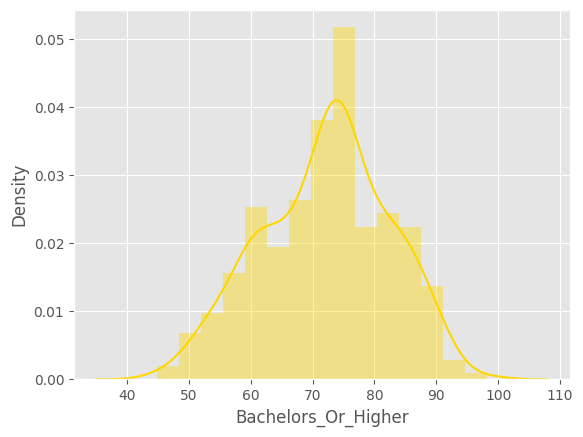

In [109]:
x = mooc_2016['Bachelors_Or_Higher']
sns.distplot(x, bins=15, color='gold')

#### Conducting a correlation test allows us to obtain a preliminary idea of which variables are most impactful on the desired outcomes of earning a certificate or completing a course. A heat map helps visualize these relationships. 

In [110]:
mooc_2016.corr()

<ipython-input-110-991b9373d8b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mooc_2016.corr()


,Year,Honor_Code_Certificates,Participants,N_Completed_50_Percent_Audit,Certificate,Percentage_Audited,Percentage_Certified,Course_Content_Accessed,Posted_In_Forum,Grade_Higher_Than_Zero,Total_Course_Hours,Hours_Certification,Age,Male,Female,Bachelors_Or_Higher
Year,1.000000,-0.371216,-0.275028,-0.310598,-0.505300,0.245831,-0.092178,-0.432969,-0.208171,-0.322277,-0.327359,0.020573,-0.085625,-0.046774,0.046774,0.066525
Honor_Code_Certificates,-0.371216,1.000000,0.132148,0.172172,0.292400,0.045013,0.392686,0.535052,0.044785,0.280544,0.105779,-0.025564,-0.007979,-0.011557,0.011557,-0.019144
Participants,-0.275028,0.132148,1.000000,0.854020,0.423183,-0.278157,-0.167368,-0.003601,-0.062613,-0.036733,0.560770,-0.009575,-0.124782,0.155968,-0.155968,-0.240486
N_Completed_50_Percent_Audit,-0.310598,0.172172,0.854020,1.000000,0.666075,-0.063784,-0.028510,0.047621,0.054229,0.125208,0.595666,-0.102736,-0.046543,0.096613,-0.096613,-0.094487
Certificate,-0.505300,0.292400,0.423183,0.666075,1.000000,-0.115775,0.270604,0.523550,0.292439,0.499648,0.674220,-0.014134,0.040495,0.034374,-0.034374,0.013544
Percentage_Audited,0.245831,0.045013,-0.278157,-0.063784,-0.115775,1.000000,0.513470,-0.091161,0.098434,0.136823,-0.292689,-0.473195,0.336011,-0.266079,0.266079,0.434868
Percentage_Certified,-0.092178,0.392686,-0.167368,-0.028510,0.270604,0.513470,1.000000,0.671251,0.437141,0.619243,-0.063390,-0.357322,0.435807,-0.376506,0.376506,0.346340
Course_Content_Accessed,-0.432969,0.535052,-0.003601,0.047621,0.523550,-0.091161,0.671251,1.000000,0.386449,0.661915,0.257929,-0.010396,0.166634,-0.230090,0.230090,0.090615
Posted_In_Forum,-0.208171,0.044785,-0.062613,0.054229,0.292439,0.098434,0.437141,0.386449,1.000000,0.485193,0.065564,-0.184622,0.391966,-0.422240,0.422240,0.209505
Grade_Higher_Than_Zero,-0.322277,0.280544,-0.036733,0.125208,0.499648,0.136823,0.619243,0.661915,0.485193,1.000000,0.272611,-0.051306,0.178276,-0.182352,0.182352,0.199938


<ipython-input-111-18c648127258>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mooc_2016.corr(), cmap = 'Spectral', annot=True)


<Axes: title={'center': 'Correlation of Variables in MOOC Dataset'}>

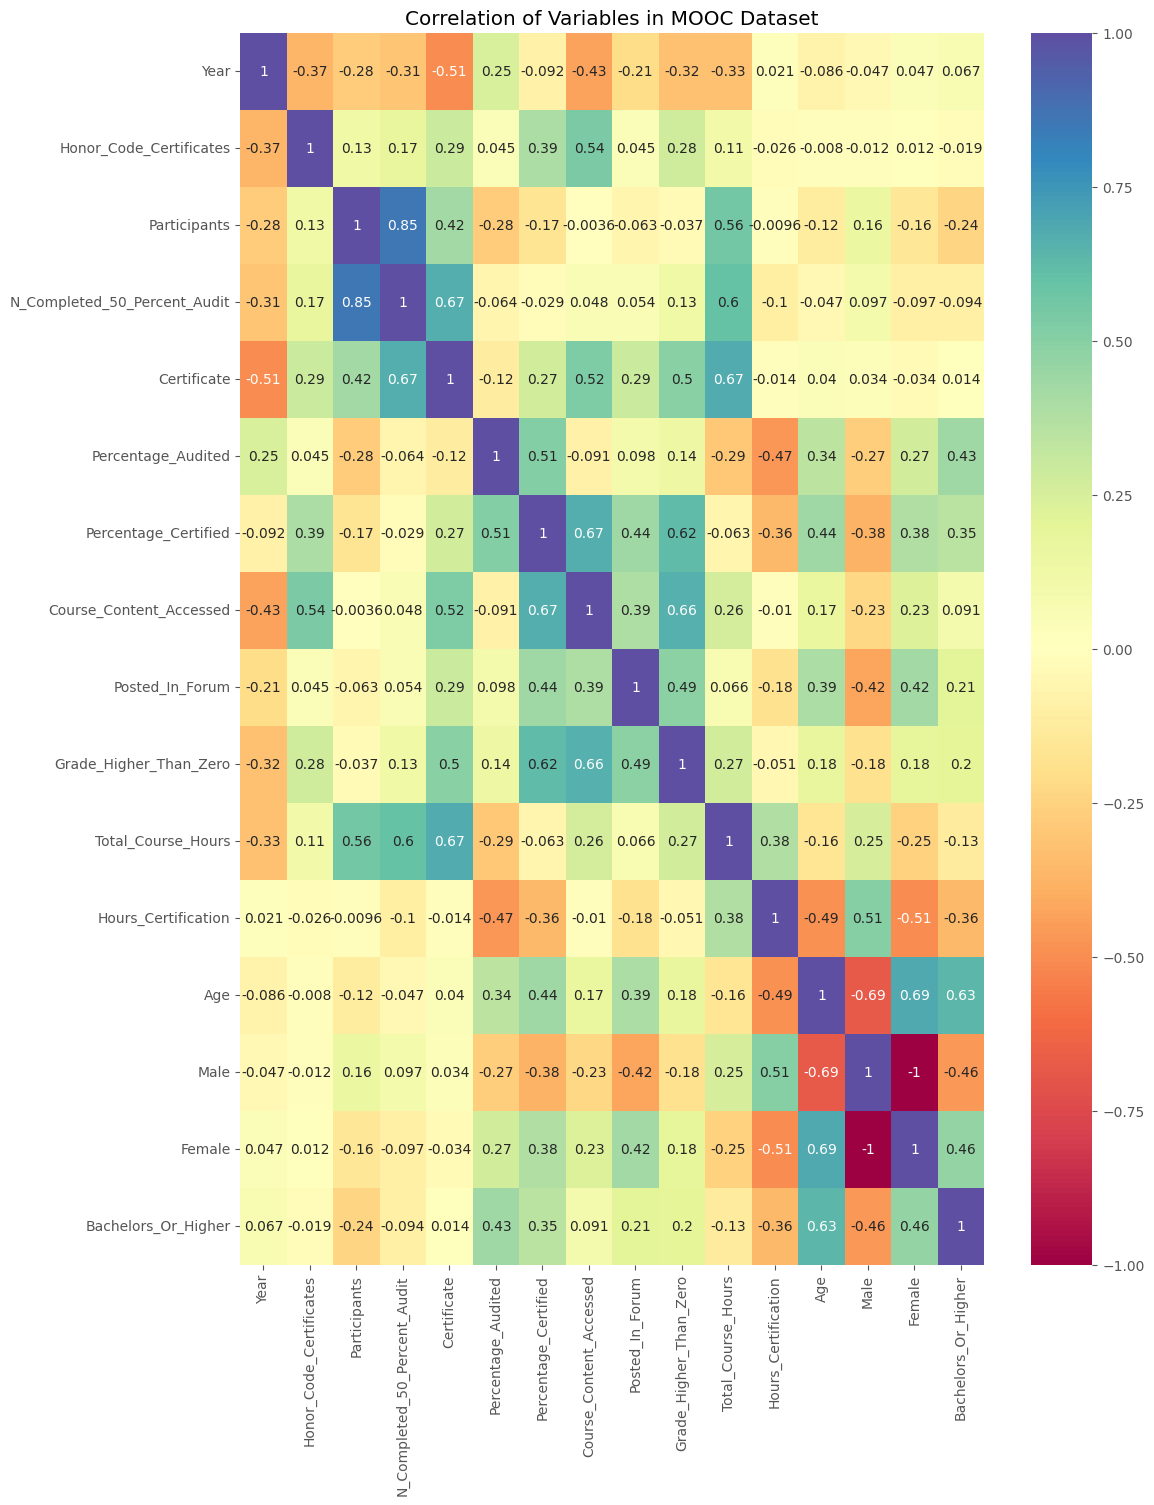

In [111]:
plt.figure(figsize=(12,16))
plt.title('Correlation of Variables in MOOC Dataset')
sns.heatmap(mooc_2016.corr(), cmap = 'Spectral', annot=True)

### The third dataset includes information that describes the attributes of content on the EDX platform. 

In [ ]:
mooc_2017 = pd.read_csv('big_student_clear_third_version.csv',quoting=3, error_bad_lines=False)

In [113]:
mooc_2017.shape

(413941, 22)

In [114]:
mooc_2017.head(3)

,"""""","""institute""","""course_id""","""year""","""semester""","""userid_DI""","""viewed""","""explored""","""certified""","""final_cc_cname_DI""",...,"""grade""","""start_time_DI""","""last_event_DI""","""nevents""","""ndays_act""","""nplay_video""","""nchapters""","""nforum_posts""","""incomplete_flag""","""age"""
0,"""4""","""HarvardX""","""PH207x""",2012,"""Fall""","""MHxPC130313697""","""0""",0,"""0""","""India""",...,0.0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,"""6""","""HarvardX""","""PH207x""",2012,"""Fall""","""MHxPC130237753""","""1""",0,"""0""","""United States""",...,0.0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,"""7""","""HarvardX""","""CS50x""",2012,"""Summer""","""MHxPC130202970""","""1""",0,"""0""","""United States""",...,0.0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24


In [115]:
mooc_2017 = mooc_2017.drop(mooc_2017.columns[0],axis=1)

In [116]:
mooc_2017.head(3)

,"""institute""","""course_id""","""year""","""semester""","""userid_DI""","""viewed""","""explored""","""certified""","""final_cc_cname_DI""","""LoE_DI""",...,"""grade""","""start_time_DI""","""last_event_DI""","""nevents""","""ndays_act""","""nplay_video""","""nchapters""","""nforum_posts""","""incomplete_flag""","""age"""
0,"""HarvardX""","""PH207x""",2012,"""Fall""","""MHxPC130313697""","""0""",0,"""0""","""India""","""Bachelor's""",...,0.0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,"""HarvardX""","""PH207x""",2012,"""Fall""","""MHxPC130237753""","""1""",0,"""0""","""United States""","""Secondary""",...,0.0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,"""HarvardX""","""CS50x""",2012,"""Summer""","""MHxPC130202970""","""1""",0,"""0""","""United States""","""Bachelor's""",...,0.0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24


In [117]:
mooc_2017.columns=['Institute', 'Course_ID', 'Course_Year', 'Semester', 'ID', 'Viewed', 'Explored', 'Certified', 'Country', 'Ed_Level', 'Gender', 'Grade', 'Start_Date', 'Last_Activity_Date', 'N_Events', 'N_Active_Days', 'N_Played_Video', 'N_Chapters', 'N_Forum_Posts', 'Flagged_Incomplete', 'Age']

In [118]:
mooc_2017.head(3)

,Institute,Course_ID,Course_Year,Semester,ID,Viewed,Explored,Certified,Country,Ed_Level,...,Grade,Start_Date,Last_Activity_Date,N_Events,N_Active_Days,N_Played_Video,N_Chapters,N_Forum_Posts,Flagged_Incomplete,Age
0,"""HarvardX""","""PH207x""",2012,"""Fall""","""MHxPC130313697""","""0""",0,"""0""","""India""","""Bachelor's""",...,0.0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,"""HarvardX""","""PH207x""",2012,"""Fall""","""MHxPC130237753""","""1""",0,"""0""","""United States""","""Secondary""",...,0.0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,"""HarvardX""","""CS50x""",2012,"""Summer""","""MHxPC130202970""","""1""",0,"""0""","""United States""","""Bachelor's""",...,0.0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24


In [119]:
mooc_2017['Start_Date'] = pd.to_datetime(mooc_2017['Start_Date'])
mooc_2017['Last_Activity_Date'] = pd.to_datetime(mooc_2017['Last_Activity_Date'])

In [120]:
mooc_2017.head(3)

,Institute,Course_ID,Course_Year,Semester,ID,Viewed,Explored,Certified,Country,Ed_Level,...,Grade,Start_Date,Last_Activity_Date,N_Events,N_Active_Days,N_Played_Video,N_Chapters,N_Forum_Posts,Flagged_Incomplete,Age
0,"""HarvardX""","""PH207x""",2012,"""Fall""","""MHxPC130313697""","""0""",0,"""0""","""India""","""Bachelor's""",...,0.0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,"""HarvardX""","""PH207x""",2012,"""Fall""","""MHxPC130237753""","""1""",0,"""0""","""United States""","""Secondary""",...,0.0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,"""HarvardX""","""CS50x""",2012,"""Summer""","""MHxPC130202970""","""1""",0,"""0""","""United States""","""Bachelor's""",...,0.0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24


In [121]:
mooc_2017.isna().sum()

Institute             0
Course_ID             0
Course_Year           0
Semester              0
ID                    0
Viewed                0
Explored              0
Certified             0
Country               0
Ed_Level              0
Gender                0
Grade                 0
Start_Date            0
Last_Activity_Date    0
N_Events              0
N_Active_Days         0
N_Played_Video        0
N_Chapters            0
N_Forum_Posts         0
Flagged_Incomplete    0
Age                   0
dtype: int64

In [173]:
Le = LabelEncoder()

In [243]:
mooc_2017['Certified'] = Le.fit_transform(mooc_2017['Certified'])
mooc_2017['Viewed'] = Le.fit_transform(mooc_2017['Viewed'])


In [244]:
mooc_2017.describe()

,Course_Year,Viewed,Explored,Certified,Grade,N_Events,N_Active_Days,N_Played_Video,N_Chapters,N_Forum_Posts,Flagged_Incomplete,Age
count,413941.000000,413941.000000,413941.000000,413941.000000,413941.000000,413941.000000,413941.000000,413941.000000,413941.000000,413941.000000,413941.000000,413941.000000
mean,2012.568419,0.710444,0.077567,0.035638,0.040314,376.711570,5.229852,121321.547776,2.659666,0.018592,0.029081,26.930826
std,0.495297,0.453557,0.267489,0.185386,0.163428,1350.123107,10.845912,96255.091365,4.306430,0.191631,0.168035,8.577910
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,2012.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,21.000000
50%,2013.000000,1.000000,0.000000,0.000000,0.000000,20.000000,2.000000,197757.000000,1.000000,0.000000,0.000000,25.000000
75%,2013.000000,1.000000,0.000000,0.000000,0.000000,135.000000,4.000000,197757.000000,3.000000,0.000000,0.000000,30.000000
max,2013.000000,1.000000,1.000000,1.000000,1.000000,53180.000000,205.000000,197757.000000,48.000000,8.000000,1.000000,82.000000


In [245]:
mooc_2017.corr()

<ipython-input-245-b387e93660d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mooc_2017.corr()


,Course_Year,Viewed,Explored,Certified,Grade,N_Events,N_Active_Days,N_Played_Video,N_Chapters,N_Forum_Posts,Flagged_Incomplete,Age
Course_Year,1.000000,0.041780,-0.075651,0.001491,-0.009692,-0.026112,-0.025462,0.023516,0.015259,0.029867,0.137568,0.068859
Viewed,0.041780,1.000000,0.185048,0.122726,0.157481,0.176796,0.235873,-0.505963,0.390193,0.060771,-0.113774,-0.005520
Explored,-0.075651,0.185048,1.000000,0.631652,0.695791,0.595259,0.675008,-0.131940,0.788198,0.094874,-0.050133,0.011785
Certified,0.001491,0.122726,0.631652,1.000000,0.932730,0.637700,0.684905,-0.133728,0.623139,0.095184,-0.033270,0.001085
Grade,-0.009692,0.157481,0.695791,0.932730,1.000000,0.701107,0.745614,-0.178120,0.689580,0.107671,-0.042500,-0.000304
N_Events,-0.026112,0.176796,0.595259,0.637700,0.701107,1.000000,0.843638,-0.288722,0.605670,0.125754,-0.048289,0.010823
N_Active_Days,-0.025462,0.235873,0.675008,0.684905,0.745614,0.843638,1.000000,-0.283550,0.710839,0.144355,-0.058795,0.025845
N_Played_Video,0.023516,-0.505963,-0.131940,-0.133728,-0.178120,-0.288722,-0.283550,1.000000,-0.239504,-0.048643,0.084209,0.021955
N_Chapters,0.015259,0.390193,0.788198,0.623139,0.689580,0.605670,0.710839,-0.239504,1.000000,0.142002,-0.091020,0.023106
N_Forum_Posts,0.029867,0.060771,0.094874,0.095184,0.107671,0.125754,0.144355,-0.048643,0.142002,1.000000,-0.014165,-0.027207


<ipython-input-246-f988bf6e256b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mooc_2017.corr(), cmap= 'twilight_shifted', annot=True)


Text(0.5, 1.0, 'Correlation of Variables in Large MOOC Dataset')

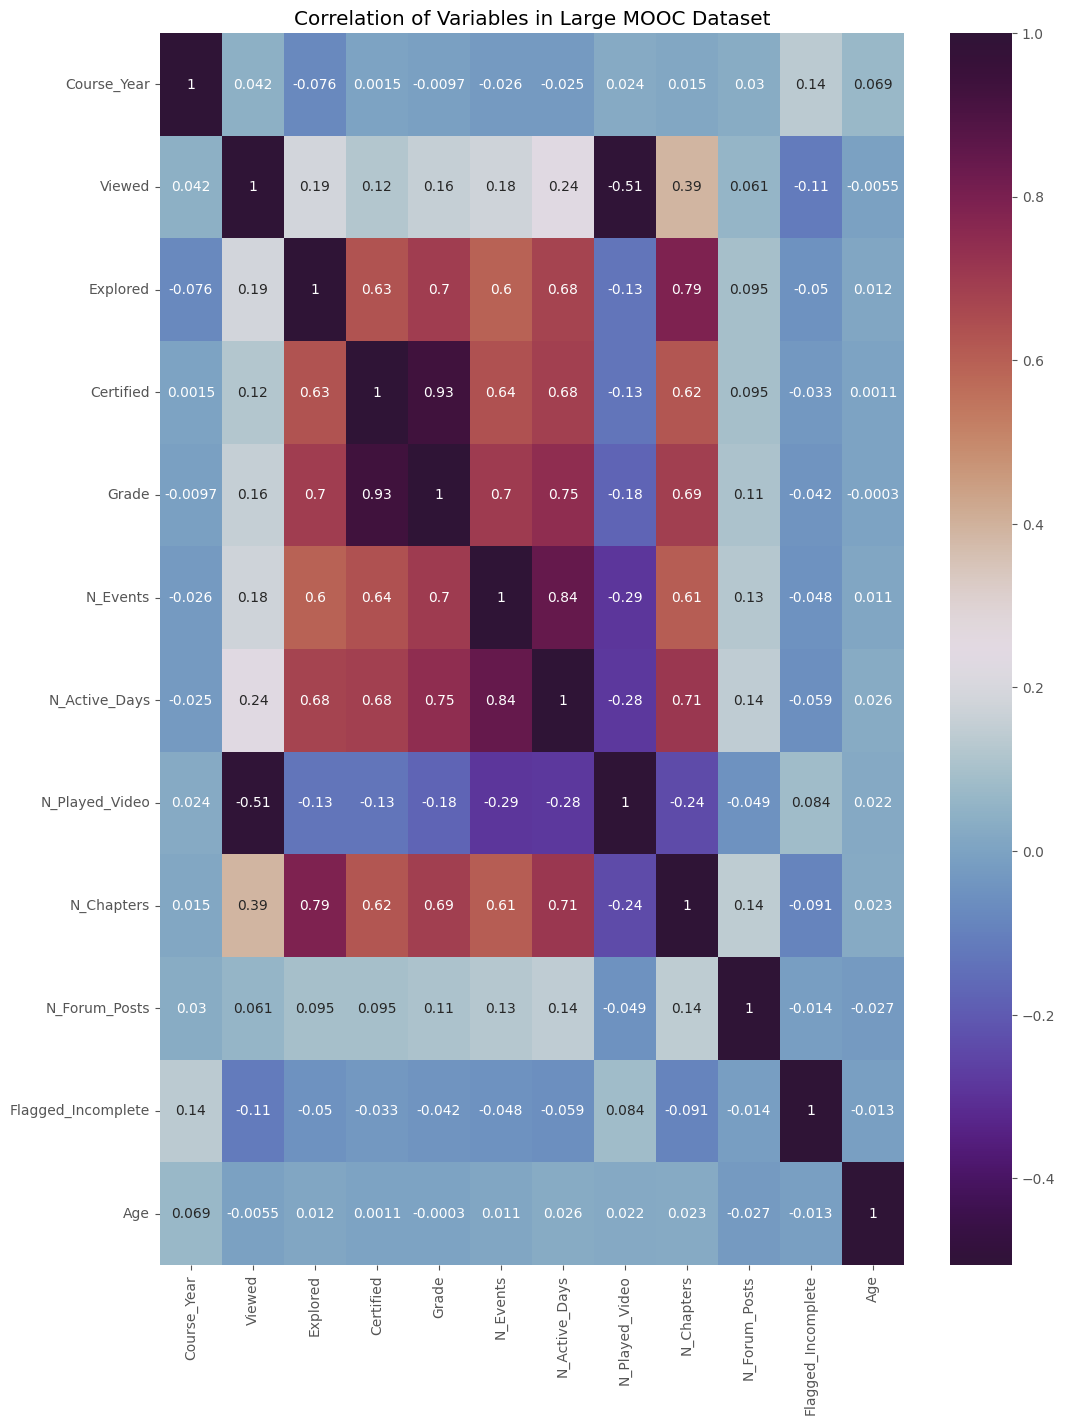

In [246]:
plt.figure(figsize=(12,16))
sns.heatmap(mooc_2017.corr(), cmap= 'twilight_shifted', annot=True)
plt.title('Correlation of Variables in Large MOOC Dataset')

<ipython-input-247-6965f91302bc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'orange')


<Axes: xlabel='Age', ylabel='Density'>

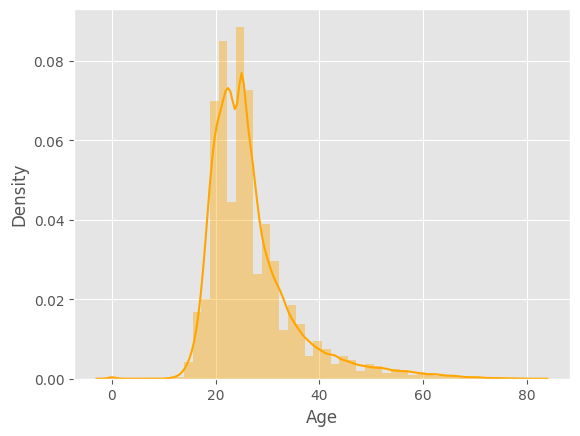

In [247]:
x = mooc_2017['Age']
sns.distplot(x, color = 'orange')

<ipython-input-248-8a1d43528dfa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'purple', bins=20)


<Axes: xlabel='N_Chapters', ylabel='Density'>

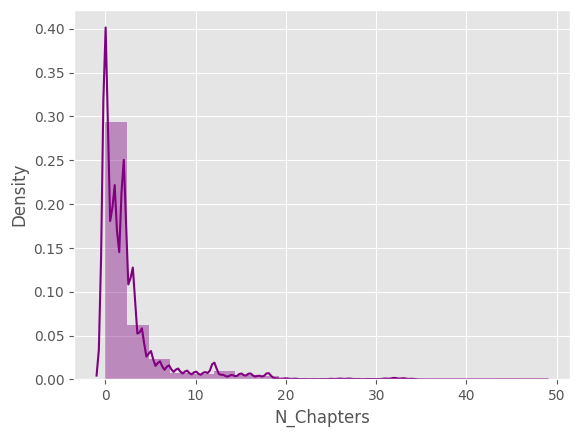

In [248]:
x = mooc_2017['N_Chapters']
sns.distplot(x, color = 'purple', bins=20)

<ipython-input-249-0949b7828427>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color='orange', bins=50)


<Axes: xlabel='N_Active_Days', ylabel='Density'>

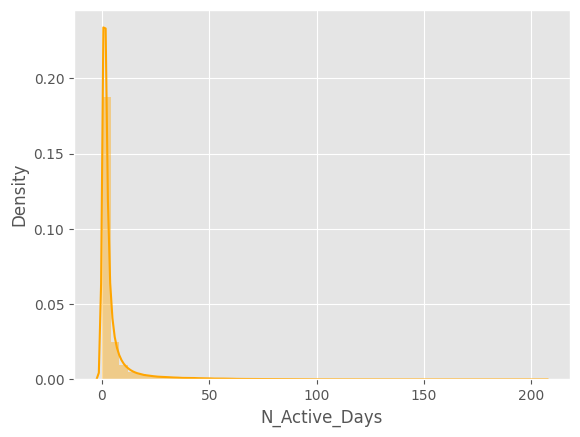

In [249]:
x = mooc_2017['N_Active_Days']
sns.distplot(x, color='orange', bins=50)

#### The final dataset provides insight into the correlation between the number of subscribers, reviews, published lectures and whether or not a student will pay for such content. 

In [250]:
web_dev = pd.read_csv('udemy_courses.csv')

In [251]:
web_dev.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


In [252]:
web_dev.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [253]:
del web_dev['course_id']
del web_dev['url']
del web_dev['subject']

In [254]:
web_dev.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z


In [255]:
web_dev.columns = ['Course_Title', 'Is_Paid', 'Price', 'Num_Subs', 'Num_Reviews', 'Num_Published_Lectures', 'Instructional_Level', 'Content_Info', 'Published_Time']

In [256]:
web_dev.head(3)

,Course_Title,Is_Paid,Price,Num_Subs,Num_Reviews,Num_Published_Lectures,Instructional_Level,Content_Info,Published_Time
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z


In [257]:
web_dev['Published_Time'] = pd.to_datetime(web_dev['Published_Time'])

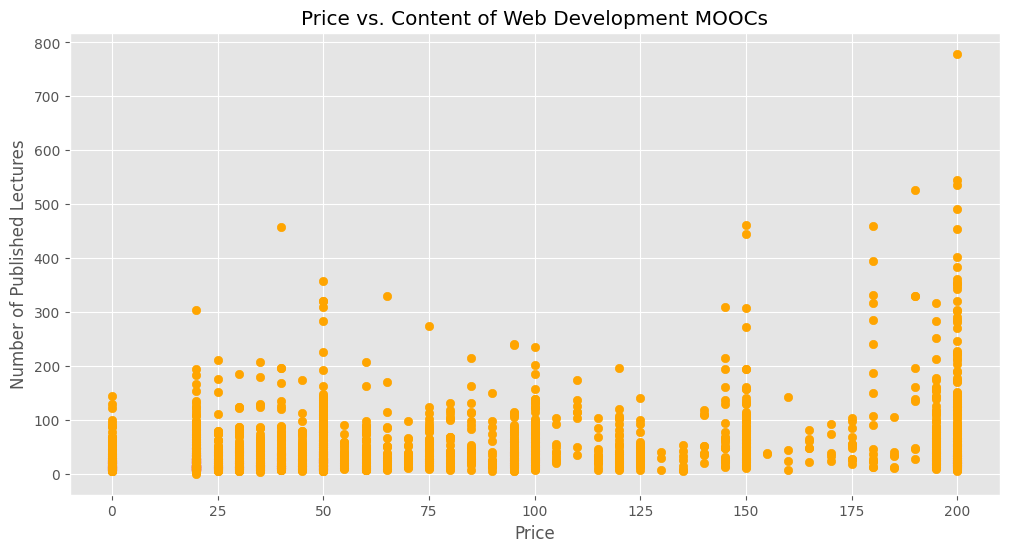

In [258]:
plt.figure(figsize=(12,6))
plt.scatter(x = 'Price', y = 'Num_Published_Lectures', data = web_dev, color = 'orange')
plt.title('Price vs. Content of Web Development MOOCs')
plt.xlabel('Price')
plt.ylabel('Number of Published Lectures')
plt.show()

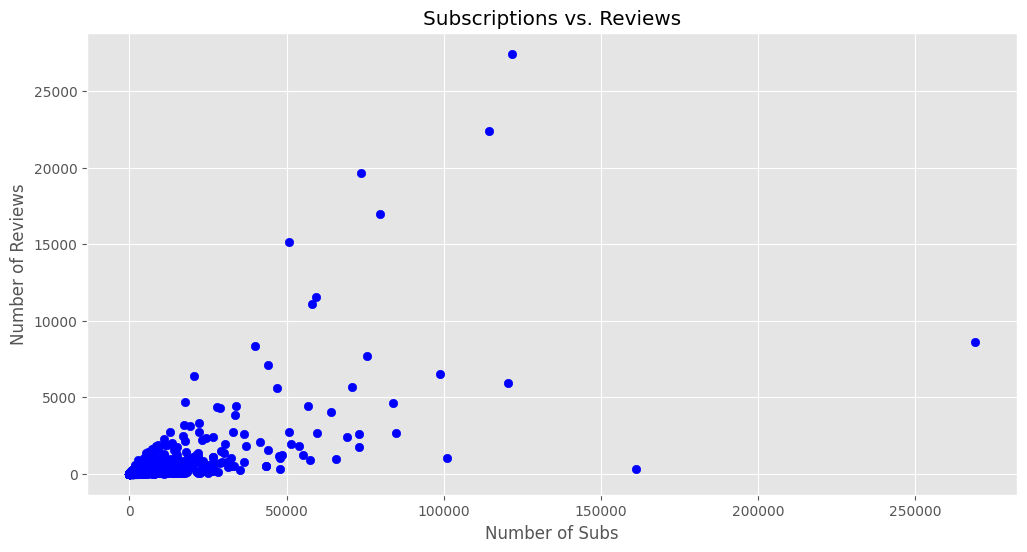

In [259]:
plt.figure(figsize=(12,6))
plt.scatter(x = 'Num_Subs', y = 'Num_Reviews', data = web_dev, color = 'blue')
plt.title('Subscriptions vs. Reviews')
plt.xlabel('Number of Subs')
plt.ylabel('Number of Reviews')
plt.show()

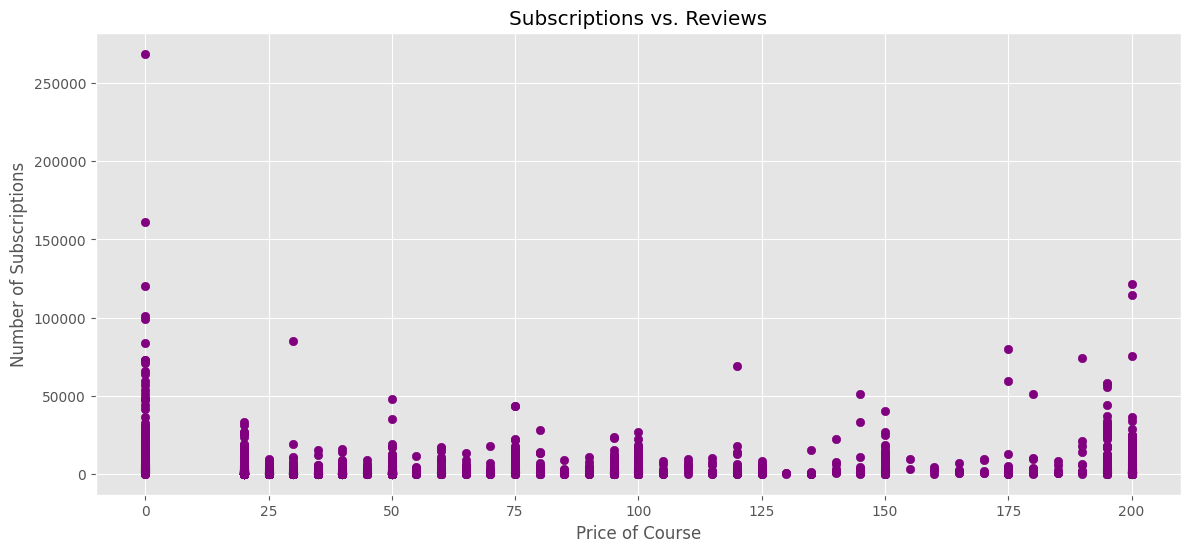

In [260]:
plt.figure(figsize=(14,6))
plt.scatter(x = 'Price', y = 'Num_Subs', data = web_dev, color = 'purple')
plt.title('Subscriptions vs. Reviews')
plt.xlabel('Price of Course')
plt.ylabel('Number of Subscriptions')
plt.show()

<ipython-input-261-06be7b5a37c4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=30, color = 'blue')


Text(0.5, 0, 'Number of Lectures')

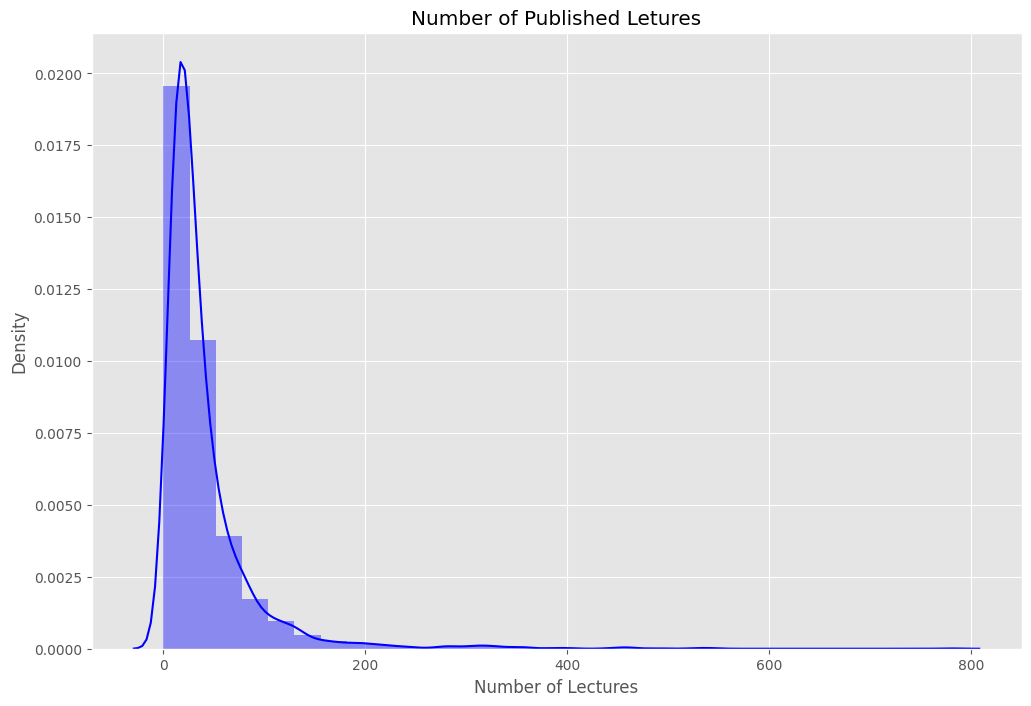

In [261]:
x = web_dev['Num_Published_Lectures']
plt.figure(figsize=(12,8))
sns.distplot(x, bins=30, color = 'blue')
plt.title('Number of Published Letures')
plt.xlabel('Number of Lectures')

In [262]:
web_dev.corr()

<ipython-input-262-75dc5c5a17fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  web_dev.corr()


,Is_Paid,Price,Num_Subs,Num_Reviews,Num_Published_Lectures,Content_Info
Is_Paid,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
Price,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
Num_Subs,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
Num_Reviews,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
Num_Published_Lectures,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
Content_Info,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


<ipython-input-263-5b0b7641e49a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(web_dev.corr(),cmap='twilight_shifted',annot=True)


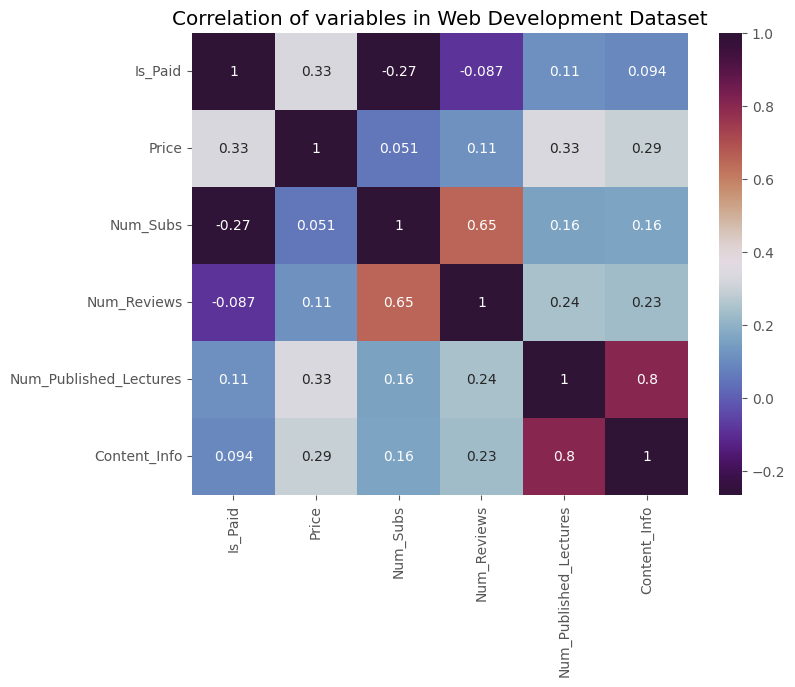

In [263]:
plt.figure(figsize=(8,6))
plt.title('Correlation of variables in Web Development Dataset')
sns.heatmap(web_dev.corr(),cmap='twilight_shifted',annot=True)
plt.show()

#### Converting string information to a numeric form makes it easier to manipulate and assess the data. 

In [264]:
Le = LabelEncoder()

In [265]:
web_dev['Is_Paid'] = Le.fit_transform(web_dev['Is_Paid'])

In [266]:
web_dev.head(3)

,Course_Title,Is_Paid,Price,Num_Subs,Num_Reviews,Num_Published_Lectures,Instructional_Level,Content_Info,Published_Time
0,Ultimate Investment Banking Course,1,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00


#### Since there were no identical column names, I elected to concatenate the data frames instead of performing an inner or outer join. 

In [267]:
mooc_all = pd.concat([edx_courses, mooc_2016, mooc_2017, web_dev]).fillna(0)

In [268]:
mooc_all.head(5)

,EDX_Title,Summary,N_Enrolled,Course_Type,Institution,EDX_Instructors,Level,EDX_Subject,Language,Subtitles,...,Flagged_Incomplete,Course_Title,Is_Paid,Price,Num_Subs,Num_Reviews,Num_Published_Lectures,Instructional_Level,Content_Info,Published_Time
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


<ipython-input-269-0dfd3838fec9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mooc_all.corr()
<ipython-input-269-0dfd3838fec9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mooc_all.corr(), annot=False)


Text(0.5, 1.0, 'Correlation Plot of All Variables in Data Sets')

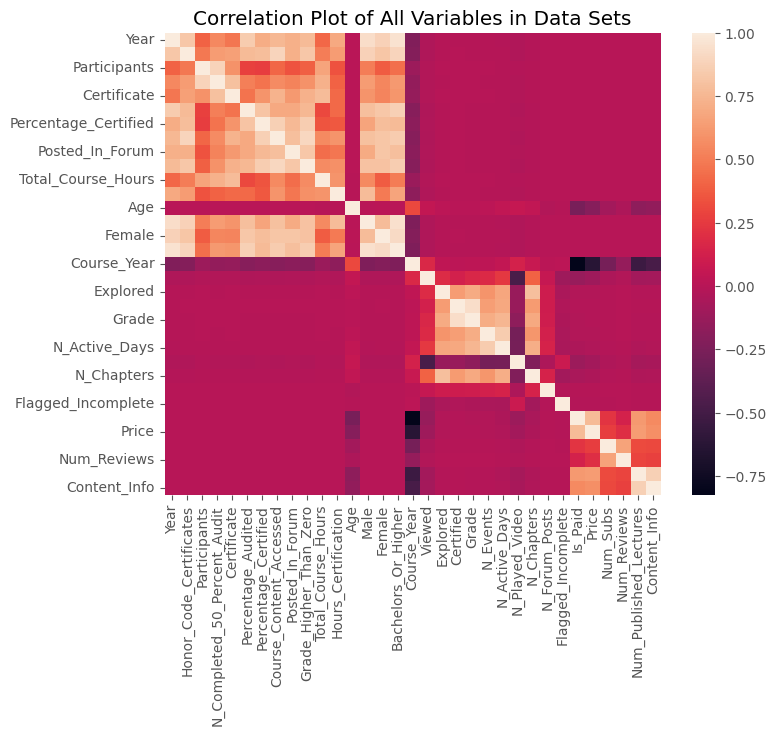

In [269]:
mooc_all.corr()
plt.figure(figsize=(8,6))
sns.heatmap(mooc_all.corr(), annot=False)
plt.title('Correlation Plot of All Variables in Data Sets')

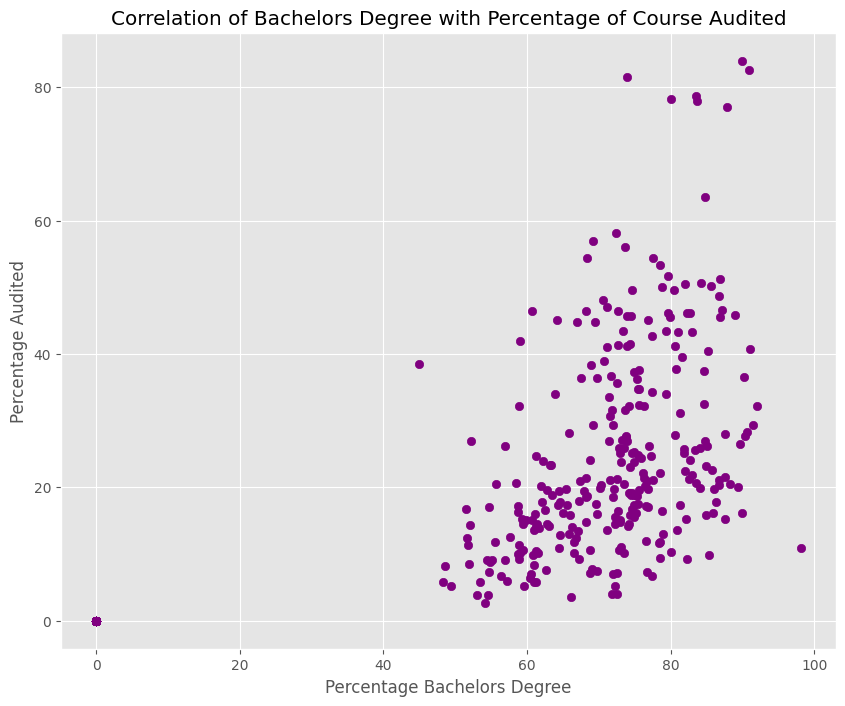

In [270]:
plt.figure(figsize=(10,8))
plt.scatter(x='Bachelors_Or_Higher', y = 'Percentage_Audited', data = mooc_all, color = 'purple')
plt.title('Correlation of Bachelors Degree with Percentage of Course Audited')
plt.xlabel('Percentage Bachelors Degree')
plt.ylabel('Percentage Audited')
plt.show()

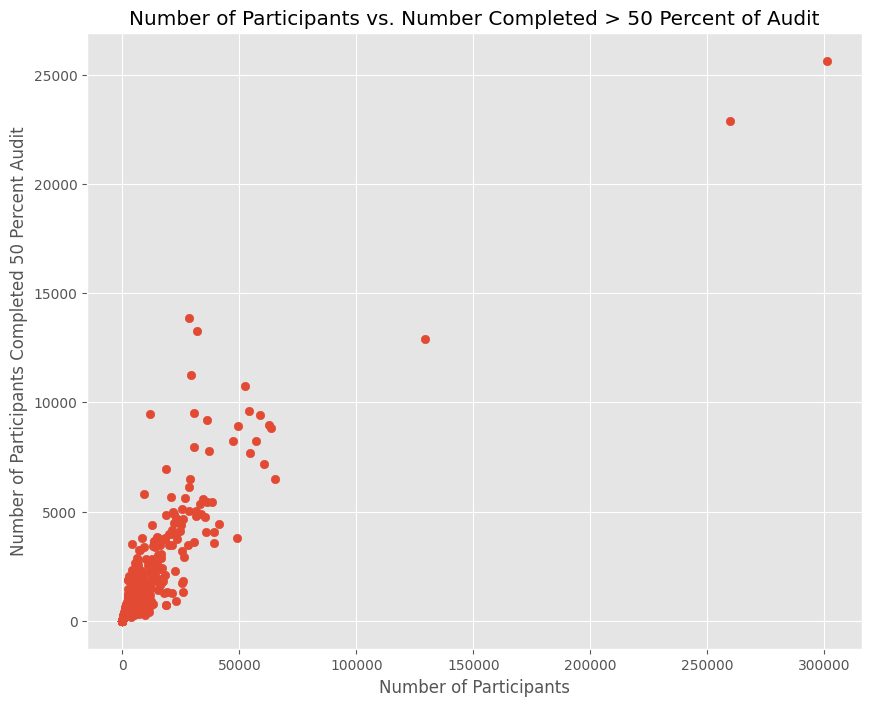

In [271]:
plt.figure(figsize=(10,8))
plt.scatter(x='Participants', y='N_Completed_50_Percent_Audit', data=mooc_all)
plt.title('Number of Participants vs. Number Completed > 50 Percent of Audit')
plt.xlabel('Number of Participants')
plt.ylabel('Number of Participants Completed 50 Percent Audit')
plt.show()

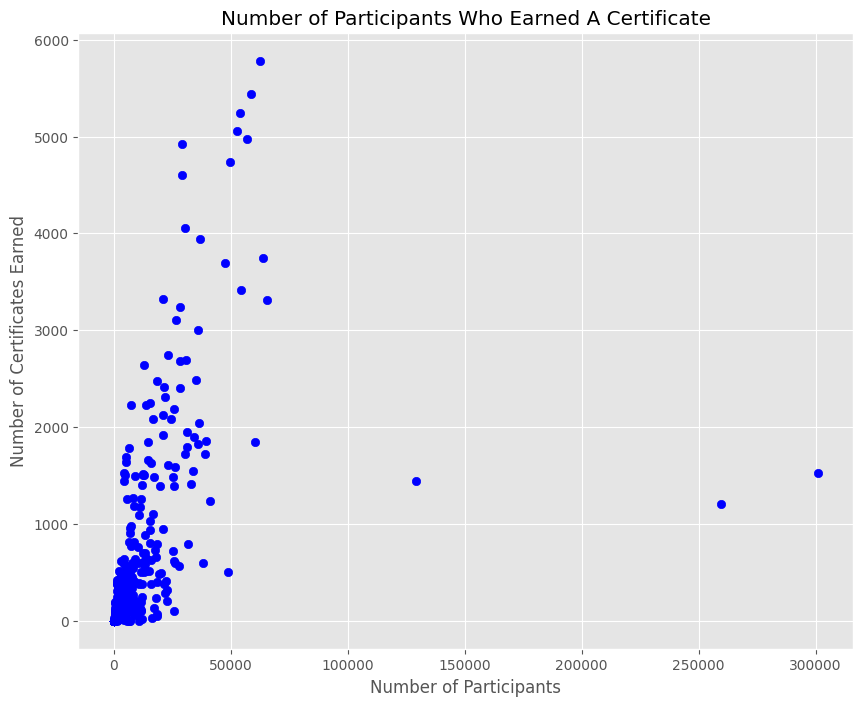

In [272]:
plt.figure(figsize=(10,8))
plt.scatter(x='Participants', y='Certificate',data=mooc_all, color='blue')
plt.title('Number of Participants Who Earned A Certificate')
plt.xlabel('Number of Participants')
plt.ylabel('Number of Certificates Earned')
plt.show()

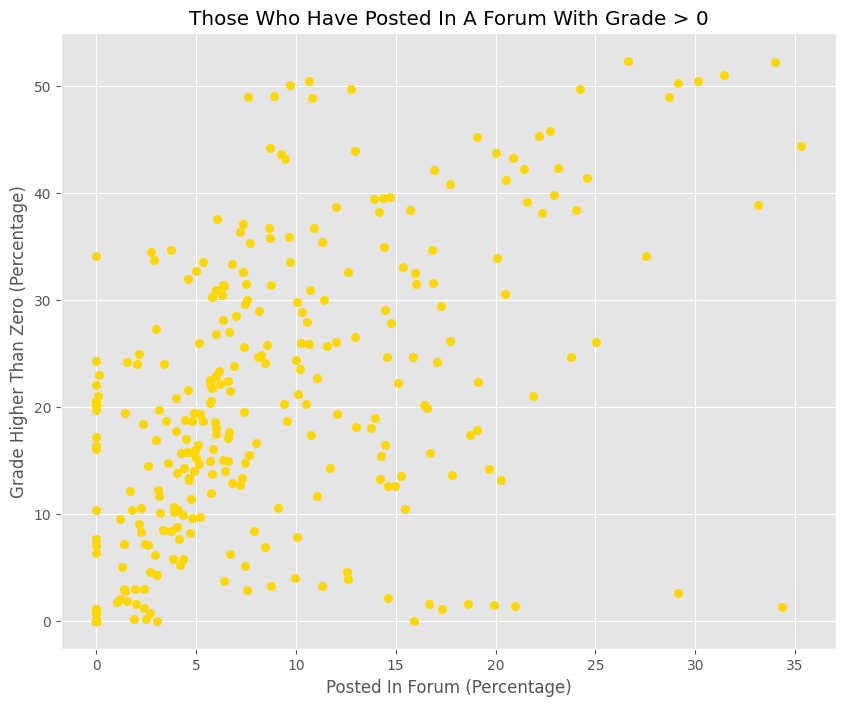

In [273]:
plt.figure(figsize=(10,8))
plt.scatter(x='Posted_In_Forum', y='Grade_Higher_Than_Zero', data=mooc_all, color='gold')
plt.title('Those Who Have Posted In A Forum With Grade > 0')
plt.xlabel('Posted In Forum (Percentage)')
plt.ylabel('Grade Higher Than Zero (Percentage)')
plt.show()

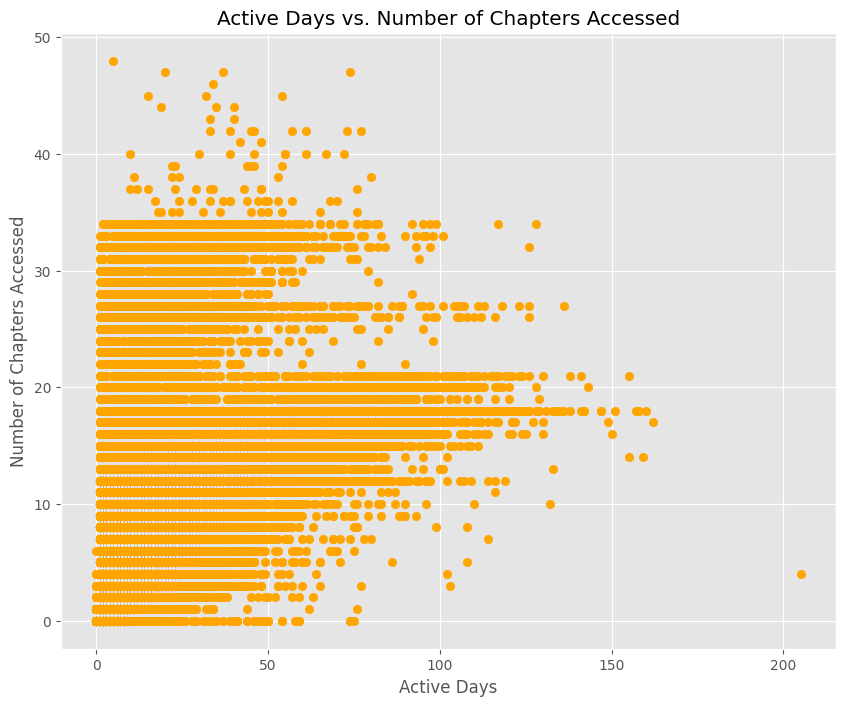

In [274]:
plt.figure(figsize=(10,8))
plt.scatter(x='N_Active_Days', y='N_Chapters', data=mooc_all, color='orange')
plt.title('Active Days vs. Number of Chapters Accessed')
plt.xlabel('Active Days')
plt.ylabel('Number of Chapters Accessed')
plt.show()

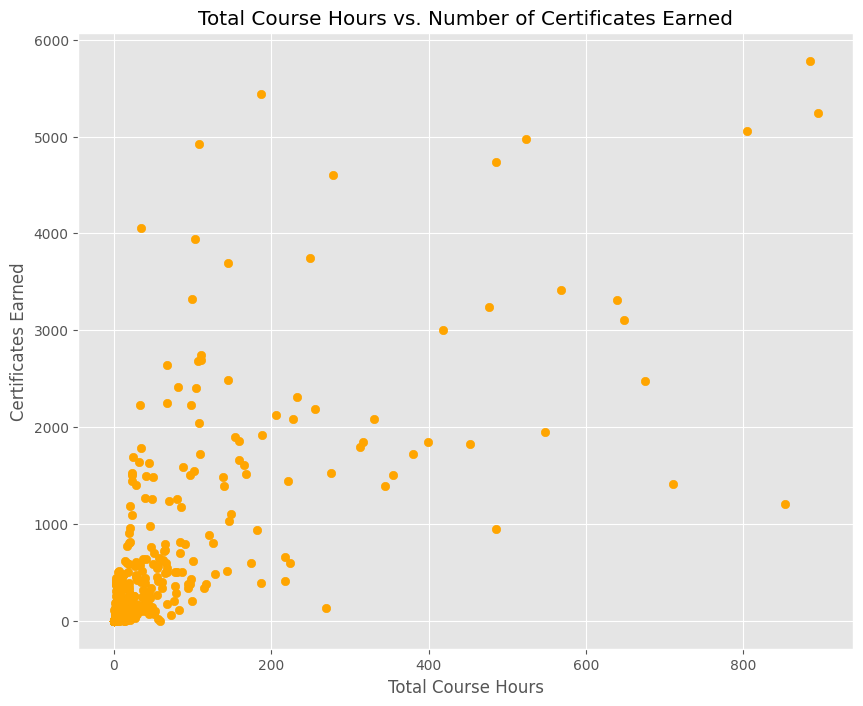

In [275]:
plt.figure(figsize=(10,8))
plt.scatter(x='Total_Course_Hours', y='Certificate', data=mooc_all, color='orange')
plt.title('Total Course Hours vs. Number of Certificates Earned')
plt.xlabel('Total Course Hours')
plt.ylabel('Certificates Earned')
plt.show()

In [276]:
mooc_all.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418883 entries, 0 to 3677
Data columns (total 67 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   EDX_Title                     418883 non-null  object 
 1   Summary                       418883 non-null  object 
 2   N_Enrolled                    418883 non-null  object 
 3   Course_Type                   418883 non-null  object 
 4   Institution                   418883 non-null  object 
 5   EDX_Instructors               418883 non-null  object 
 6   Level                         418883 non-null  object 
 7   EDX_Subject                   418883 non-null  object 
 8   Language                      418883 non-null  object 
 9   Subtitles                     418883 non-null  object 
 10  Course_Effort                 418883 non-null  object 
 11  Course_Length                 418883 non-null  object 
 12  EDX_Price                     418883 non-null 

#### Since logistic regression can only work with numeric variables, I created a subset with these data types.

In [277]:
mooc_all_num = mooc_all[['Participants', 'Bachelors_Or_Higher', 'Posted_In_Forum', 'Grade_Higher_Than_Zero', 'Price', 'Num_Subs', 'Num_Reviews', 'Num_Published_Lectures', 'Is_Paid', 'N_Events', 'N_Active_Days', 'N_Chapters', 'N_Forum_Posts', 'Flagged_Incomplete', 'Grade', 'Viewed', 'Explored', 'Certified', 'Course_Year', 'Male', 'Female', 'Age', 'Hours_Certification', 'Total_Course_Hours', 'Played_Video', 'Course_Content_Accessed', 'Percentage_Certified', 'Percentage_Audited', 'N_Completed_50_Percent_Audit', 'Honor_Code_Certificates', 'Year']]

<ipython-input-278-d2f3a66baec2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mooc_all_num.corr()
<ipython-input-278-d2f3a66baec2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mooc_all_num.corr(), annot=True, cmap='viridis')


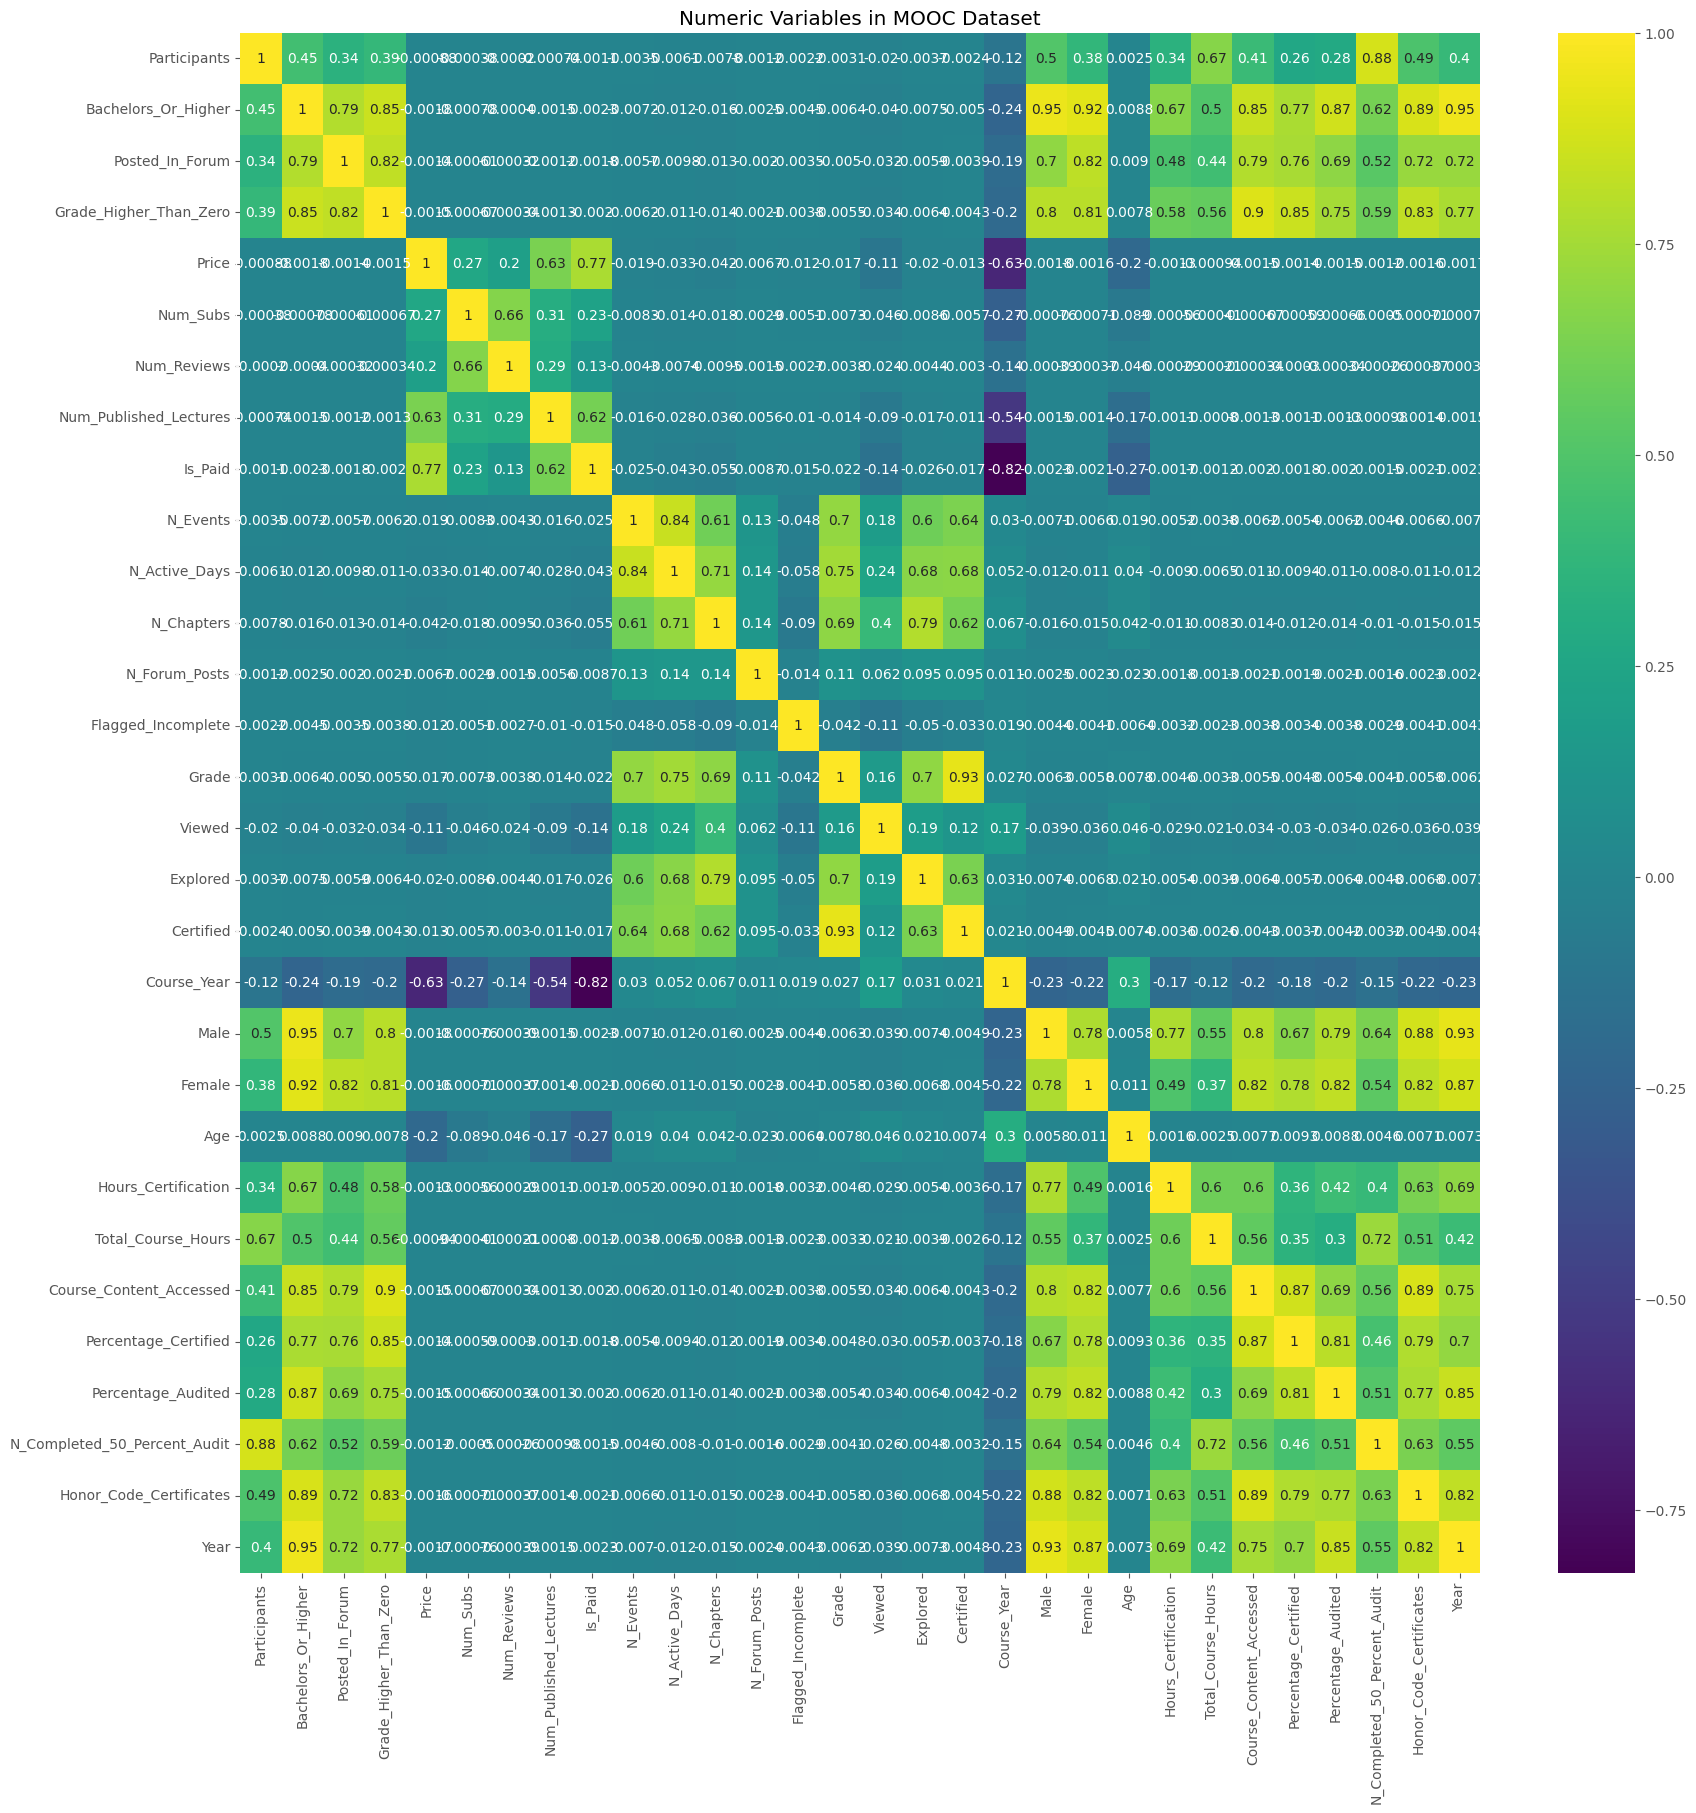

In [278]:
plt.figure(figsize=(20,20))
mooc_all_num.corr()
sns.heatmap(mooc_all_num.corr(), annot=True, cmap='viridis')
plt.title('Numeric Variables in MOOC Dataset')
plt.show()

In [279]:
mooc_all_num_2 = mooc_all_num[['Male', 'Female', 'Hours_Certification', 'Total_Course_Hours', 'Course_Content_Accessed', 'Honor_Code_Certificates', 'Percentage_Audited', 'Percentage_Certified', 'Posted_In_Forum', 'Bachelors_Or_Higher', 'Num_Subs', 'Num_Reviews', 'Grade_Higher_Than_Zero', 'Participants', 'N_Completed_50_Percent_Audit', 'N_Chapters', 'N_Events']]

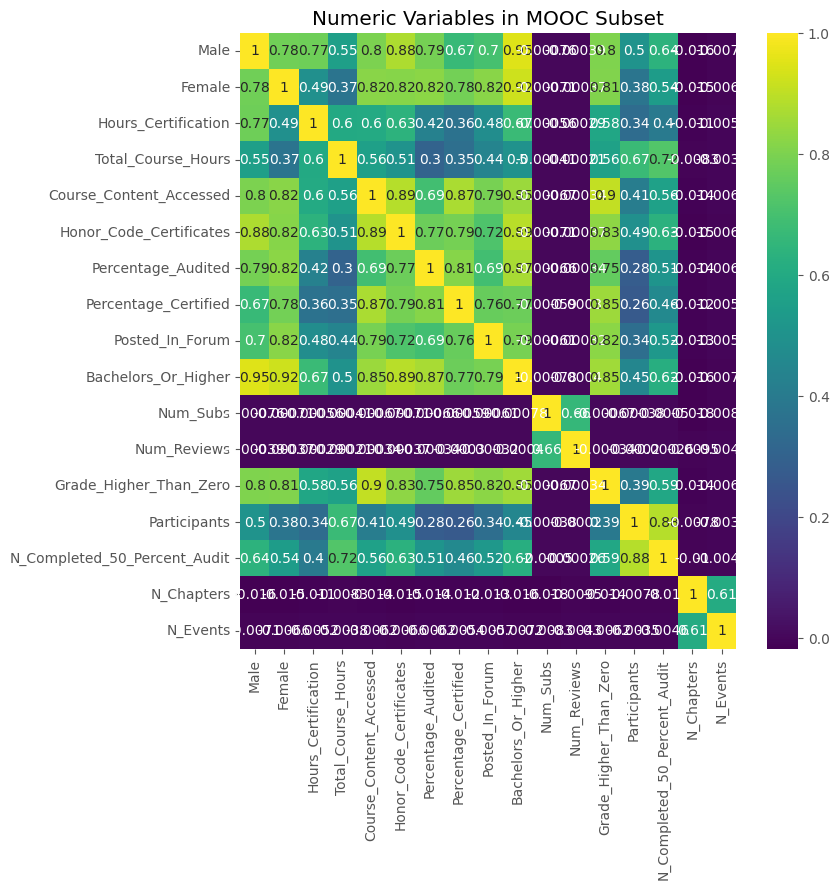

In [280]:
plt.figure(figsize=(8,8))
mooc_all_num_2.corr()
sns.heatmap(mooc_all_num_2.corr(), annot=True, cmap='viridis')
plt.title('Numeric Variables in MOOC Subset')
plt.show()

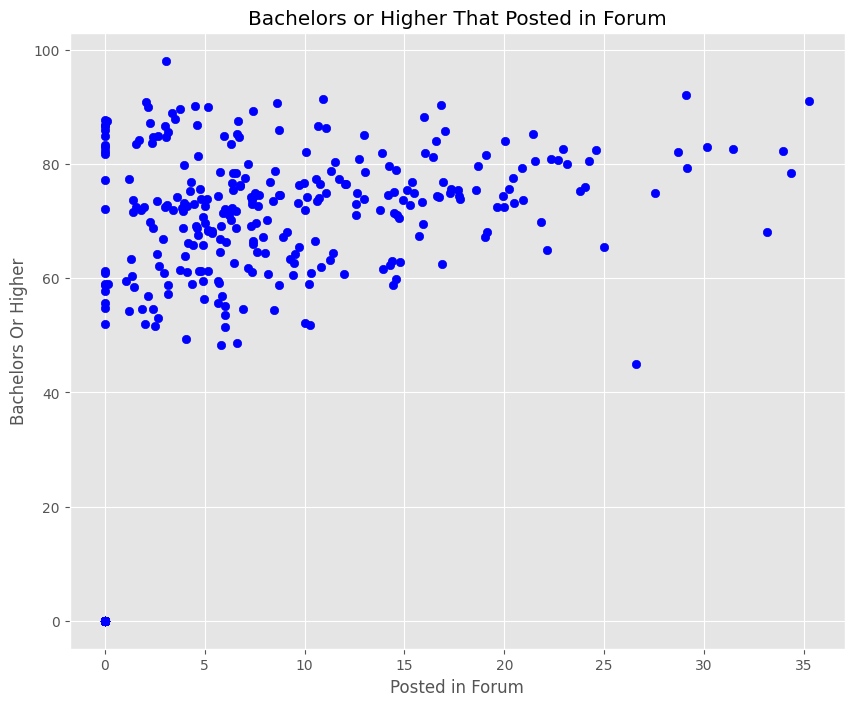

In [281]:
plt.figure(figsize=(10,8))
plt.scatter(x = 'Posted_In_Forum', y = 'Bachelors_Or_Higher', data= mooc_all_num, color='blue')
plt.title('Bachelors or Higher That Posted in Forum')
plt.xlabel('Posted in Forum')
plt.ylabel('Bachelors Or Higher')
plt.show()

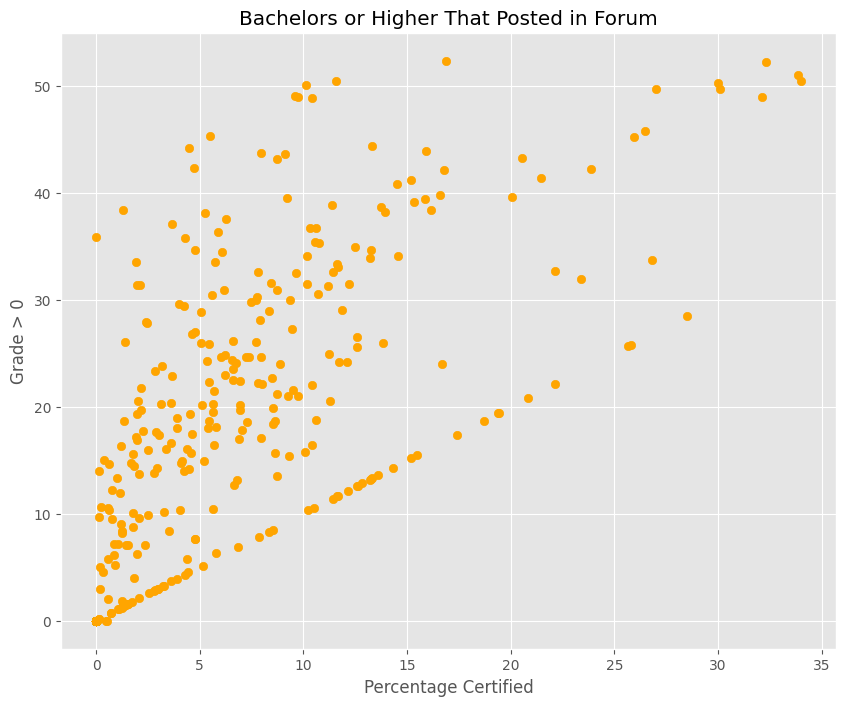

In [282]:
plt.figure(figsize=(10,8))
plt.scatter(x = 'Percentage_Certified', y = 'Grade_Higher_Than_Zero', data= mooc_all_num, color='orange')
plt.title('Bachelors or Higher That Posted in Forum')
plt.xlabel('Percentage Certified')
plt.ylabel('Grade > 0')
plt.show()

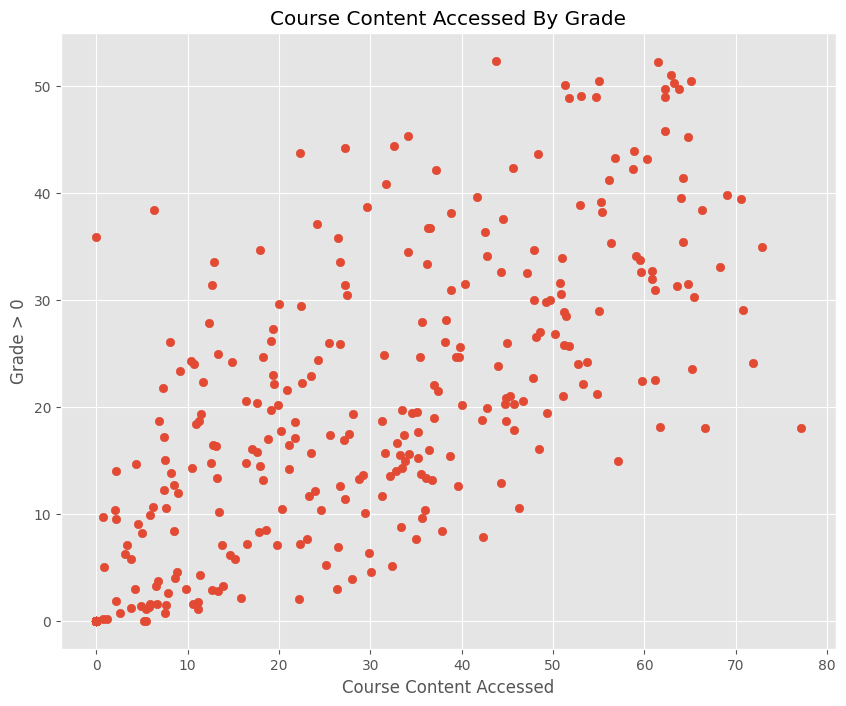

In [283]:
plt.figure(figsize=(10,8))
plt.scatter(x = 'Course_Content_Accessed', y = 'Grade_Higher_Than_Zero', data= mooc_all_num)
plt.title('Course Content Accessed By Grade')
plt.xlabel('Course Content Accessed')
plt.ylabel('Grade > 0')
plt.show()

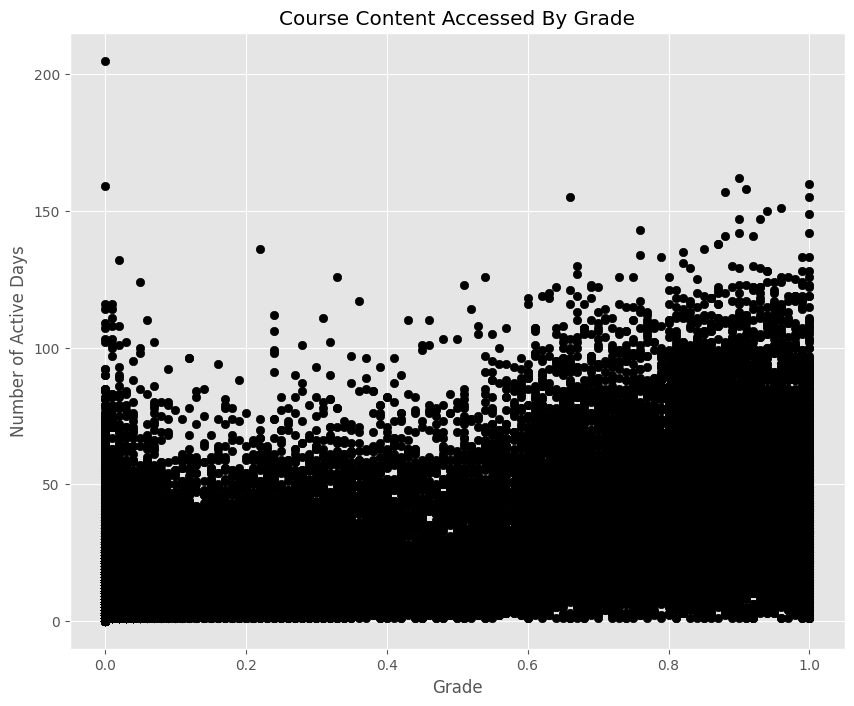

In [284]:
plt.figure(figsize=(10,8))
plt.scatter(x = 'Grade', y = 'N_Active_Days', data= mooc_all_num, color='black')
plt.title('Course Content Accessed By Grade')
plt.xlabel('Grade')
plt.ylabel('Number of Active Days')
plt.show()

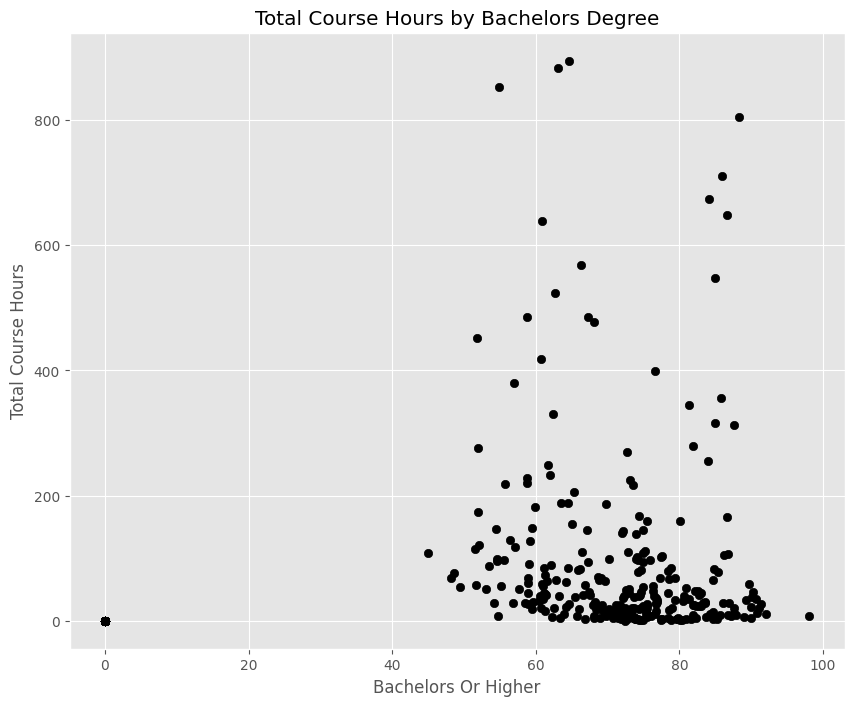

In [285]:
plt.figure(figsize=(10,8))
plt.scatter(x = 'Bachelors_Or_Higher', y = 'Total_Course_Hours', data= mooc_all_num, color='black')
plt.title('Total Course Hours by Bachelors Degree')
plt.xlabel('Bachelors Or Higher')
plt.ylabel('Total Course Hours')
plt.show()

In [286]:
mooc_all_num.dtypes

Participants                    float64
Bachelors_Or_Higher             float64
Posted_In_Forum                 float64
Grade_Higher_Than_Zero          float64
Price                           float64
Num_Subs                        float64
Num_Reviews                     float64
Num_Published_Lectures          float64
Is_Paid                         float64
N_Events                        float64
N_Active_Days                   float64
N_Chapters                      float64
N_Forum_Posts                   float64
Flagged_Incomplete              float64
Grade                           float64
Viewed                          float64
Explored                        float64
Certified                       float64
Course_Year                     float64
Male                            float64
Female                          float64
Age                             float64
Hours_Certification             float64
Total_Course_Hours              float64
Played_Video                     object


In [287]:
mooc_all.head(3)

,EDX_Title,Summary,N_Enrolled,Course_Type,Institution,EDX_Instructors,Level,EDX_Subject,Language,Subtitles,...,Flagged_Incomplete,Course_Title,Is_Paid,Price,Num_Subs,Num_Reviews,Num_Published_Lectures,Instructional_Level,Content_Info,Published_Time
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


# Section 2: Model 1 - Comprehensive Model

#### The first model combines demographic, behavioral and content features to predict the likelihood of a student completing a course.

In [288]:
multinomial_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [289]:
y = mooc_all_num[['Certified']]
X = mooc_all_num[['Hours_Certification', 'Total_Course_Hours', 'Course_Content_Accessed', 'Percentage_Audited', 'Percentage_Certified', 'Posted_In_Forum', 'Bachelors_Or_Higher', 'Num_Subs', 'Num_Reviews', 'Grade_Higher_Than_Zero', 'Participants', 'N_Completed_50_Percent_Audit', 'N_Chapters', 'N_Events']]

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [291]:
multinomial_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [292]:
y_pred = multinomial_reg.predict(X_test)

In [293]:
from sklearn import metrics

In [294]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [295]:
cnf_matrix

array([[100293,    757],
       [  1509,   2162]])

Text(0.5, 427.9555555555555, 'Predicted label')

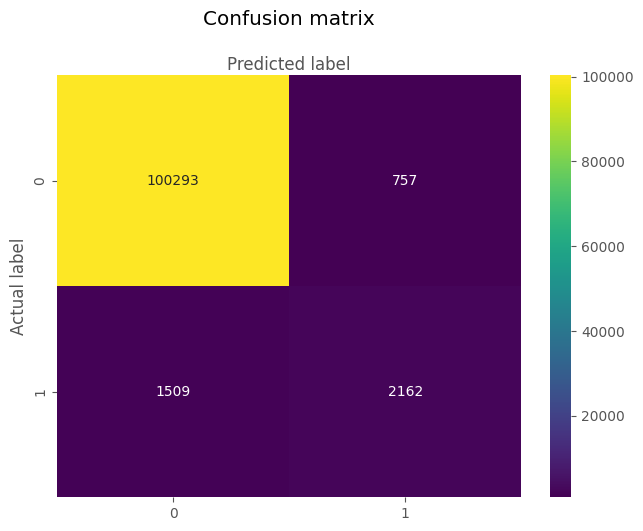

In [296]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='viridis', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [297]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9783615511692975
Precision: 0.7406646111682083
Recall: 0.5889403432307273


In [298]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    101050
         1.0       0.74      0.59      0.66      3671

    accuracy                           0.98    104721
   macro avg       0.86      0.79      0.82    104721
weighted avg       0.98      0.98      0.98    104721



# Section 3: Model 2 - Behavioral Model

#### The second model combines information related to behavior such as the course content accessed and frequency of posting in a discussion forum to predict whether or not a student will pay for an honor code certificate. 

In [299]:
y_2 = mooc_all_num[['Honor_Code_Certificates']]
X_2 = mooc_all_num[['Hours_Certification', 'Course_Content_Accessed', 'Percentage_Audited', 'Posted_In_Forum', 'Bachelors_Or_Higher', 'Grade_Higher_Than_Zero']]

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.25, random_state=0)

In [301]:
multinomial_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [302]:
y_pred = multinomial_reg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[104661,      3],
       [     6,     51]])

Text(0.5, 427.9555555555555, 'Predicted label')

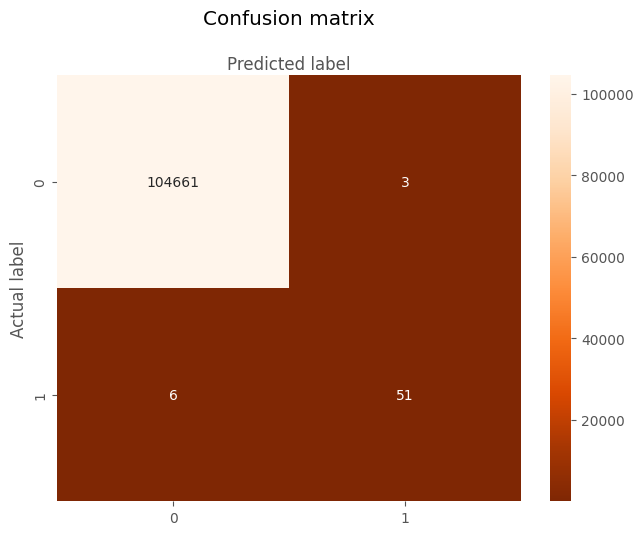

In [303]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Oranges_r', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [304]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision', metrics.precision_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))

Accuracy: 0.9999140573523935
Precision 0.9444444444444444
Recall 0.8947368421052632


In [305]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104667
         1.0       0.89      0.94      0.92        54

    accuracy                           1.00    104721
   macro avg       0.95      0.97      0.96    104721
weighted avg       1.00      1.00      1.00    104721



# Section 4: Model 3 - Content-Based Model

### The final model assessed the impact of content attributes such as the number of chapters or number of reviews on a student's decision to view module content. 

In [306]:
y_3 = mooc_all_num[['Viewed']]
X_3 = mooc_all_num[['N_Chapters', 'N_Events', 'Num_Reviews', 'Num_Subs']]

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.25, random_state=0)

In [308]:
multinomial_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [309]:
y_pred = multinomial_reg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

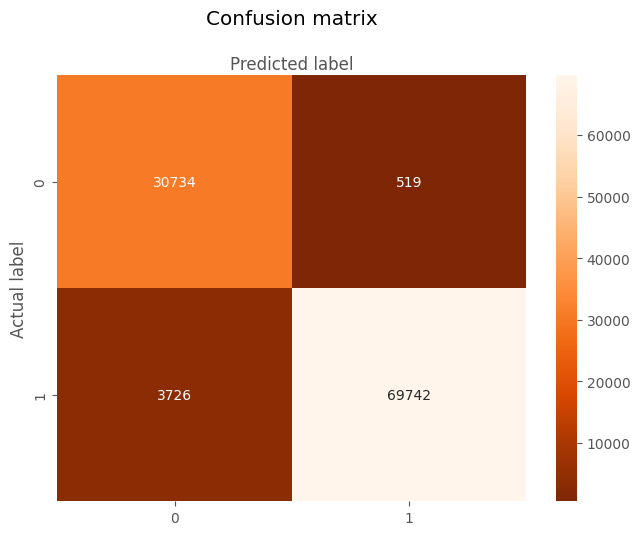

In [310]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Oranges_r', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [311]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9594637178789355
Precision: 0.9926132562872717
Recall: 0.9492840420319051


In [312]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94     31253
         1.0       0.99      0.95      0.97     73468

    accuracy                           0.96    104721
   macro avg       0.94      0.97      0.95    104721
weighted avg       0.96      0.96      0.96    104721



# Results

#### For a 75-25 split the multivariable models were very precise, with an accuracy that ranged between 95 and 99 percent. The first model was the weakest out of the three. While its accuracy rate was 97 percent, the model’s precision and recall statistics were considerably lower, at 75 and 60 percent respectively. While a 97 percent accuracy sounds ideal, it is difficult to say, with absolute certainty, that this model is that accurate because the precision and recall rates mean that it did not reliably discern between true positives, true negatives, false positives and false negatives over 75 percent of the time. 


--------------------------------------------------------------------------------


#### The next model reduced the number of independent variables by more than half to six. This time, the model combined hours of certification, course content accessed, percentage audited, the history of a student posting in a discussion forum, the number of students with a bachelor’s degree or higher and a grade higher than zero to predict whether they would earn an honor code certificate and, ultimately, pay for such a distinction (as opposed to conducting a free audit). The reduction of variables resulted in a far more reliable model with an accuracy rate of 96 percent, a precision of 99 percent, and a recall of 95 percent.


--------------------------------------------------------------------------------


#### The final model combined the least amount of variables, ingesting only four columns: number of chapters, number of events, number of reviews and number of subscriptions to predict how many students would view at least one module. Like the previous model, this combination of a few highly positively correlated variables yielded a high accuracy rate of 95 percent, but more importantly, a precision rate of 99 percent, and a recall rate of 95 percent. However, this model could better discern between actual and predicted labels than the previous two iterations. 